Este código cria uma linha unidimensional dividida em 100 pontos, onde o potencial elétrico é calculado. As condições de contorno são definidas como 5 volts em uma extremidade e 0 volts na outra. O método das diferenças finitas é utilizado para iterativamente atualizar os valores do potencial até que a solução convirja dentro de uma tolerância especificada. Finalmente, o potencial elétrico ao longo da linha é plotado.

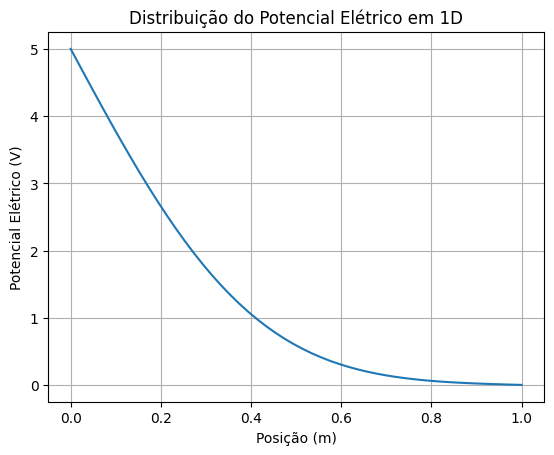

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
N = 100  # Número de pontos na grade
L = 1.0  # Comprimento da linha (metros)
V0 = 5.0  # Potencial na borda esquerda (volts)
V1 = 0.0  # Potencial na borda direita (volts)
max_iter = 1000  # Número máximo de iterações
tolerance = 1e-6  # Tolerância para a convergência

# Criação da grade
x = np.linspace(0, L, N)
dx = x[1] - x[0]  # Delta x
V = np.zeros(N)  # Inicializa o potencial com zero
V[0], V[-1] = V0, V1  # Aplica as condições de contorno

# Método das diferenças finitas
for _ in range(max_iter):
    V_old = V.copy()
    for i in range(1, N-1):
        V[i] = 0.5 * (V_old[i+1] + V_old[i-1])

    # Checa a convergência
    if np.max(np.abs(V - V_old)) < tolerance:
        break

# Plotando o resultado
plt.plot(x, V)
plt.xlabel('Posição (m)')
plt.ylabel('Potencial Elétrico (V)')
plt.title('Distribuição do Potencial Elétrico em 1D')
plt.grid(True)
plt.show()


A fórmula `V[i] = 0.5 * (V_old[i+1] + V_old[i-1])` usada no código é um exemplo clássico do método das diferenças finitas para resolver a equação de Laplace em uma dimensão. A equação de Laplace para o potencial eletrostático `V` em uma dimensão é dada por:

$$ \frac{d^2V}{dx^2} = 0 $$

Em termos das diferenças finitas, a segunda derivada de `V` em relação a `x` pode ser aproximada como:

$$ \frac{d^2V}{dx^2} \approx \frac{V_{i+1} - 2V_i + V_{i-1}}{\Delta x^2} $$

Para a equação de Laplace, esta expressão é igual a zero. Reorganizando os termos, obtemos:

$$ V_{i+1} - 2V_i + V_{i-1} = 0 $$
$$ V_i = \frac{1}{2} (V_{i+1} + V_{i-1}) $$

Isso significa que, em um estado estacionário (ou seja, quando o sistema alcançou o equilíbrio), o potencial em um ponto `V_i` é a média dos potenciais nos pontos adjacentes `V_{i+1}` e `V_{i-1}`. Este é um princípio fundamental na eletrostática, onde o potencial em um ponto dentro de um condutor (ou em regime estacionário) é a média dos potenciais ao redor.

Portanto, a atualização iterativa do potencial em cada ponto usando a média dos pontos adjacentes é uma forma de resolver numericamente a equação de Laplace, levando o sistema ao equilíbrio.
